# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Additional Notebook: SHAP Values

(Ungraded)

## Learning Objectives

At the end of the experiment, you will be able to

* understand the concept of shapley values.
* Implement shapley values for regression models.
* Implement shapley values for classification models.

### Introduction

This notebook is divided into two sections:
* Regression
* Classification

Implementation of SHAP has been discussed in detail both for regression and classification using different models and visualization techniques.

### SHAP (SHapley Additive exPlanations)

SHAP (SHapley Additive exPlanations) by Lundberg and Lee is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley values.




SHAP values explain a model’s output, or a feature’s impact on a model’s output. They n provide a uniform approach to explaining behaviour and they can help developers get better insight into why their models do or do not work.

The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction.



To know more about SHAP click [here](https://christophm.github.io/interpretable-ml-book/shap.html)

### Installing SHAP

In [1]:
!pip -q install shap

# **Regression**

To proceed to the official documentation of SHAP for regression click [here](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html)

### Diabetes regression with scikit-learn

### Load data

In [2]:
import warnings
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time

X,y = shap.datasets.diabetes()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars


#ignore warnings
warnings.filterwarnings('ignore')
shap.initjs()

### Linear regression

In [3]:
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

print_accuracy(lin_regr.predict)

Root mean squared test error = 58.51717127731562


### Explain a single prediction from the test set

In [4]:
shap.initjs()
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

  0%|          | 0/89 [00:00<?, ?it/s]

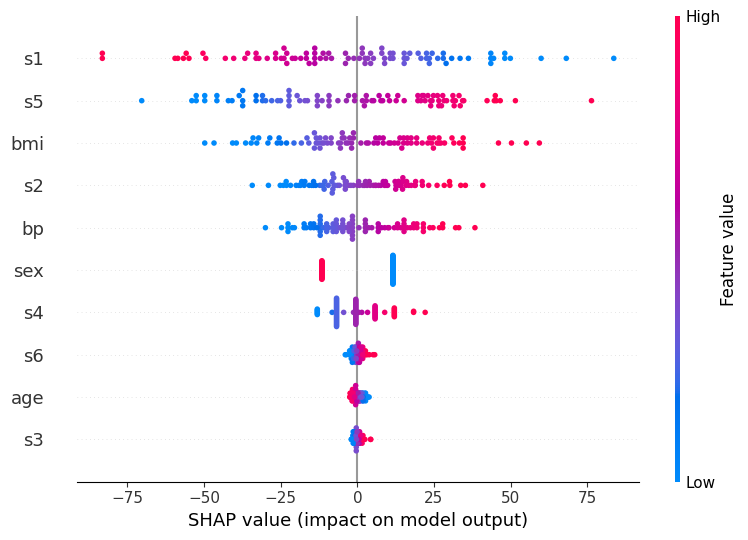

In [5]:
shap.initjs()
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

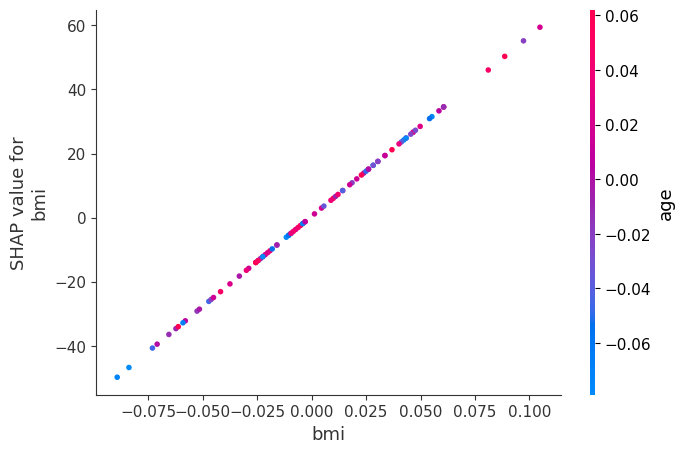

In [6]:
shap.dependence_plot("bmi", shap_values, X_test)

In [7]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test)

### Decision tree regressor

Root mean squared test error = 71.23061914642545


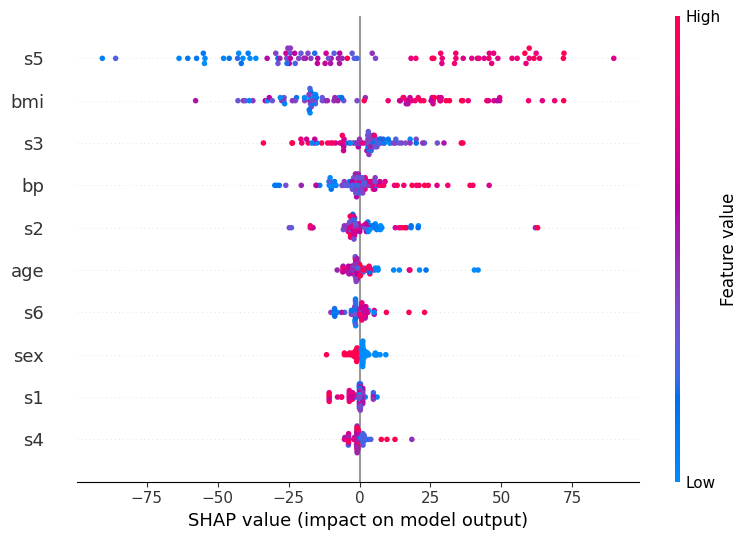

In [8]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

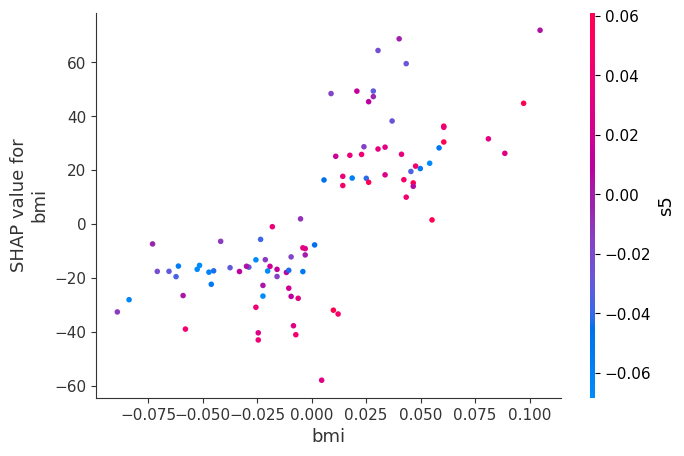

In [9]:
shap.dependence_plot("bmi", shap_values, X_test)

In [10]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test)

### Random forest

Root mean squared test error = 61.16592960743402


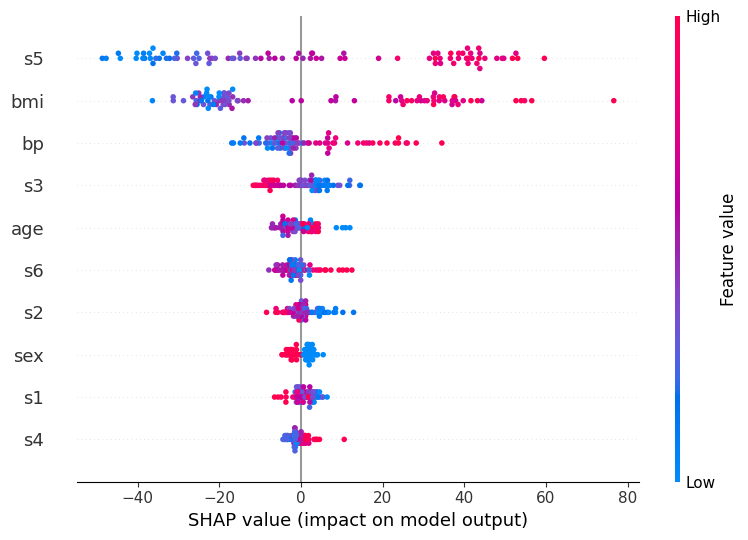

In [11]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

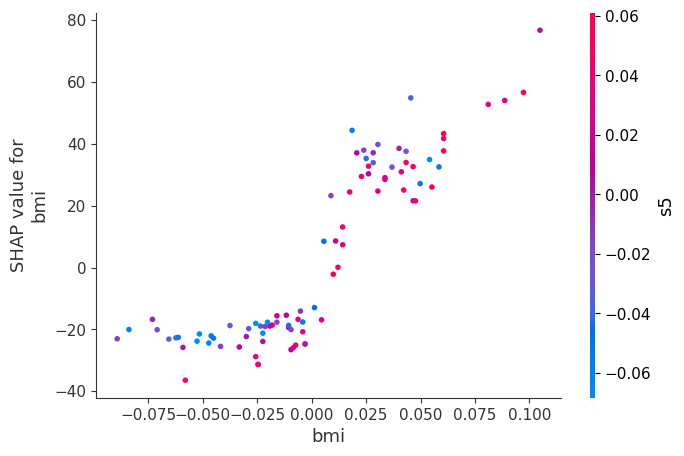

In [12]:
shap.dependence_plot("bmi", shap_values, X_test)

In [13]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)


### Neural network

Root mean squared test error = 58.230396692749125


  0%|          | 0/89 [00:00<?, ?it/s]

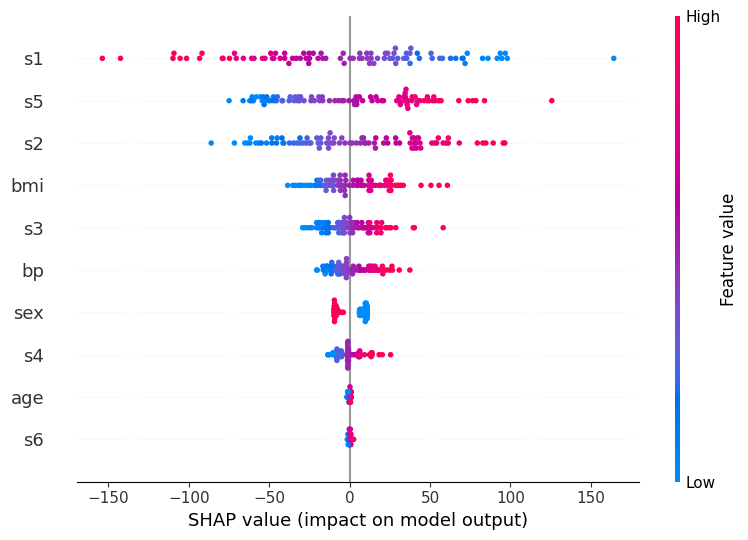

In [14]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

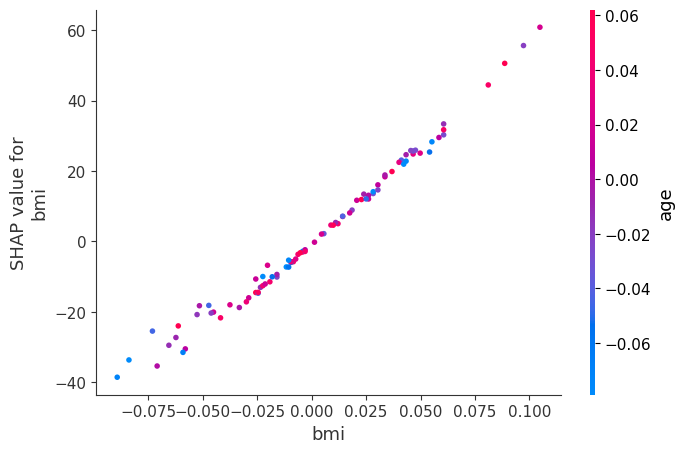

In [15]:
shap.dependence_plot("bmi", shap_values, X_test)

In [16]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

# **Classification**

To proceed to the official documentation of SHAP upon classification click [here](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html)

### Census income classification with scikit-learn


In [17]:
import sklearn
import shap

### Load the census data

In [18]:
X,y = shap.datasets.adult()
X["Occupation"] *= 1000 # to show the impact of feature scale on KNN predictions
X_display,y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

### Train a k-nearest neighbors classifier



Here we just train directly on the data, without any normalizations.




In [19]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Explain predictions

Normally we would use a logit link function to allow the additive feature inputs to better map to the model’s probabilistic output space, but knn’s can produce infinite log odds ratios so we don’t for this example.

It is important to note that Occupation is the dominant feature in the 1000 predictions we explain. This is because it has larger variations in value than the other features and so it impacts the k-nearest neighbors calculations more.

In [20]:
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_valid.iloc[0:1000,:])

PermutationExplainer explainer: 1001it [01:33, 10.12it/s]


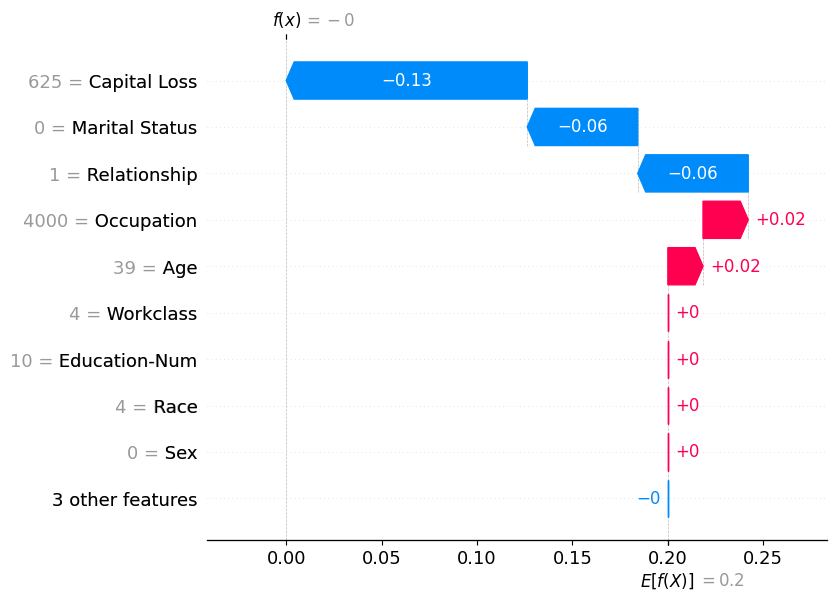

In [21]:
shap.plots.waterfall(shap_values[0])

A summary beeswarm plot is an even better way to see the relative impact of all features over the entire dataset. Features are sorted by the sum of their SHAP value magnitudes across all samples.

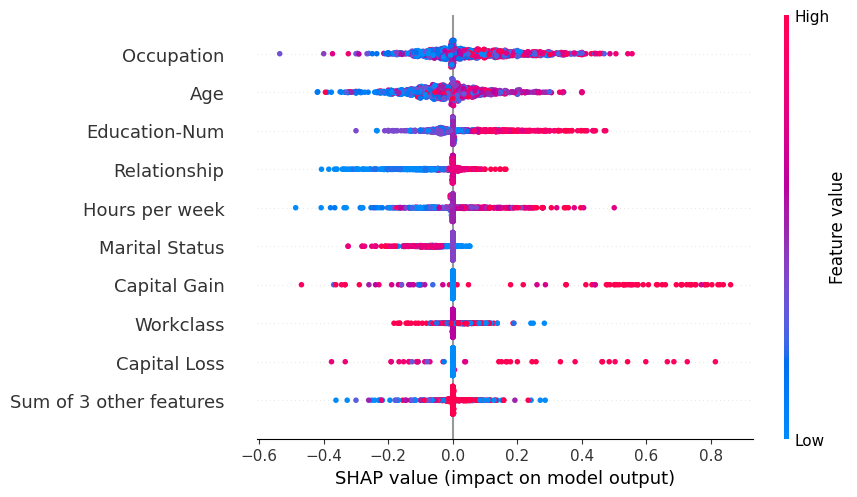

In [22]:
shap.plots.beeswarm(shap_values)

A heatmap plot provides another global view of the model’s behavior, this time with a focus on population subgroups.

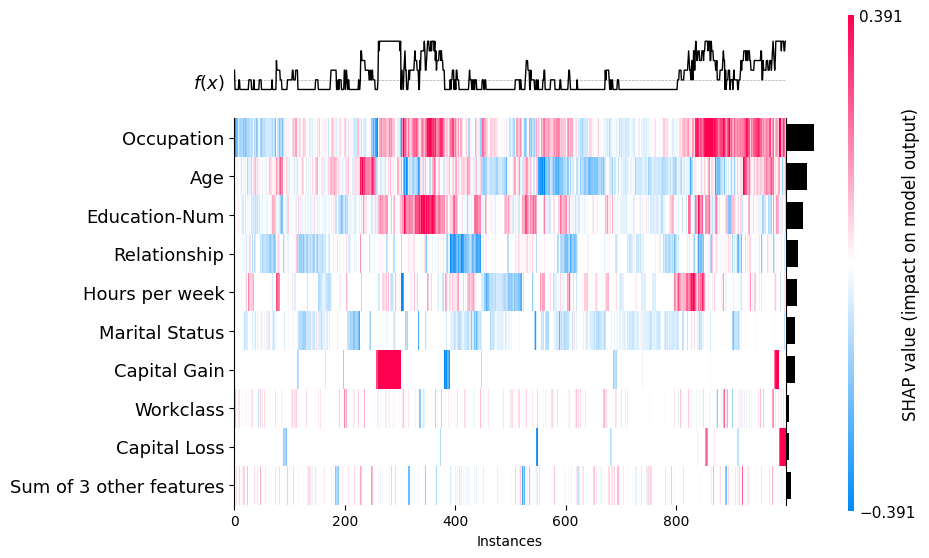

<Axes: xlabel='Instances'>

In [23]:
shap.plots.heatmap(shap_values)

### Normalize the data before training the model

Here we retrain a KNN model on standardized data.

In [24]:
# normalize data
dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
X_train_norm = X_train.copy()
X_valid_norm = X_valid.copy()
for k,dtype in dtypes:
    m = X_train[k].mean()
    s = X_train[k].std()
    X_train_norm[k] -= m
    X_train_norm[k] /= s

    X_valid_norm[k] -= m
    X_valid_norm[k] /= s

In [25]:
knn_norm = sklearn.neighbors.KNeighborsClassifier()
knn_norm.fit(X_train_norm, y_train)

KNeighborsClassifier()

### Explain predictions

When we explain predictions from the new KNN model we find that Occupation is no longer the dominant feature, but instead more predictive features, such as marital status, drive most predictions. This is a simple example of how explaining why your model is making it’s predicitons can uncover problems in the training process.

In [26]:
f = lambda x: knn_norm.predict_proba(x)[:,1]
med = X_train_norm.median().values.reshape((1,X_train_norm.shape[1]))

explainer = shap.Explainer(f, med)

shap_values_norm = explainer(X_valid_norm.iloc[0:1000,:])

PermutationExplainer explainer: 1001it [05:45,  2.82it/s]


With a summary plot with see marital status is the most important on average, but other features (such as captial gain) can have more impact on a particular individual.

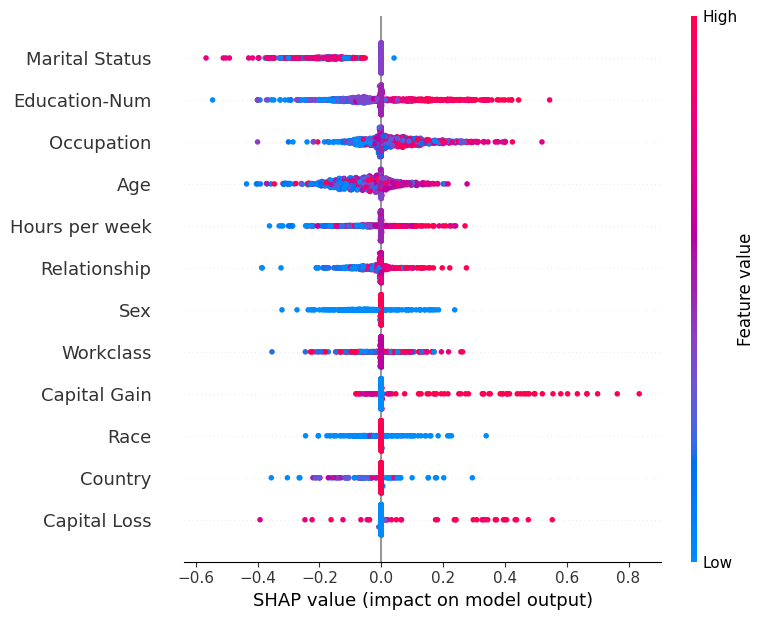

In [27]:
shap.summary_plot(shap_values_norm, X_valid.iloc[0:1000,:])

A dependence scatter plot shows how the number of years of education increases the chance of making over 50K annually.

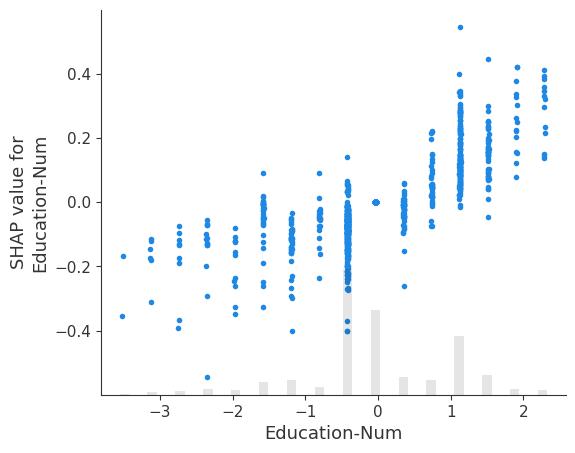

In [28]:
shap.plots.scatter(shap_values_norm[:,"Education-Num"])